In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, chi2, chi, poisson

# Problema 1


In [2]:
# PROBLEMA 1

# Genero N vectores f de 100 detecciones que siguen una distribución de Poisson (mu=0.1)
N = 1000 #Cantidad de mediciones
detectores = 100 #Número de detectores

F = poisson.rvs(mu=0.1, size=(N,detectores))


# Remplazo elementos con valor mayor a 1 poniendo un 1 en su lugar.
for i in range(len(F)):
    for j in range(len(F[i])):
        if F[i][j] > 1:
            F[i][j] = 1

# Problema 2

Realización de S: 82.27598007899903
p-value chi^2: 0.40870948990029543


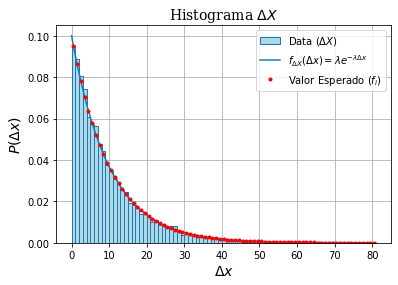

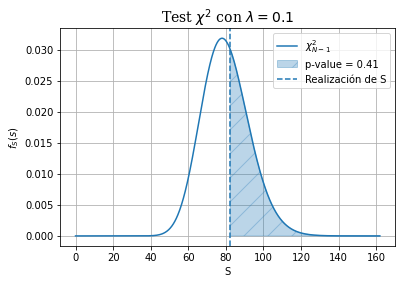

In [3]:
# PROBLEMA 2

#Calculo la diferencia de distancias entre 1 consecutivos dentro de cada vector f. En caso de que haya dos 1 consecutivos la distancia la defino = 0.
d = np.hstack(F) #Junto toda la estadística del vector F en un solo vector d

indices = np.where(d == 1)[0] #indices donde el vector d tiene un 1.

dtotal = np.diff(indices) - 1 #Vector distancias entre 1 consecutivos, si dos 1's estan seguidos cuento esa distancia como 0. 


## ESTADÍSTICO S

n = len(dtotal) #Cantidad de datos
lamb=0.1 #Lambda de la exponencial determinado a partir del mu de la Poissoniana
ni, bins = np.histogram(dtotal, bins = np.arange(0,max(dtotal),1)) #ni cuentas sin normalizar en cada bin

# Calculo fi como n*int_bin^bin+1(f(x)dx) (Valor esperado en cada bin y a la vez por ser una distribución poissoniana en cada bin fi es la var(ni))
fi = []
for i in range(len(ni)):
    p_i = expon.cdf(i+1,scale=1/lamb) - expon.cdf(i,scale=1/lamb)
    fi.append(n*p_i)
    
fi = np.array(fi) #Valor esperado de ni siendo Ho cierta    



#Obtengo el estadístico S
s = np.sum(((ni - fi)**2)/fi) #Estadístico S cuya distribución para n grande sigue una chi^2
print(f'Realización de S: {s}') #Realización de S


#Comparo histograma de distancias con la exponencial de H0
t = np.linspace(0,max(bins),10000) #vector para construir la distribución exponencial 
dbin = (bins[1] - bins[0])/2

#Ploteo
plt.close(1)
plt.figure(1)
plt.rcParams['axes.axisbelow'] = True
plt.hist(dtotal, bins = np.arange(0,max(dtotal),1), color = 'lightblue',ec='tab:blue', density=True, label='Data ($\Delta X$)')
plt.plot(t,lamb*np.exp(-lamb*t),label='$f_{\Delta X}(\Delta x)=\lambda e^{-\lambda \Delta x}$')
plt.plot(bins[:len(fi)]+dbin,fi/n, 'o', color= 'red', markersize=3,label='Valor Esperado ($f_i$)')
plt.xlabel('$\Delta x$', fontsize=14, family='serif')
plt.ylabel('$P(\Delta x)$', fontsize=14, family='serif')
plt.title('Histograma $\Delta X$', fontsize=14, family='serif')
plt.legend()
plt.grid()

#----------------------------------------------------#
## TEST chi2

pvalor_chi2 = 1 - chi2.cdf(s, df=len(ni)-1) #p-value a cola derecha en estadístico chi^2 con N-1 grados de libertad



x = np.linspace(0, 2*len(ni), 1000)
y = chi2.pdf(x, df=len(ni)-1)

#Ploteo de p-value
plt.close(2)
plt.figure(2)
plt.rcParams['axes.axisbelow'] = True
plt.plot(x, y, label='$\chi^2_{N-1}$')
plt.fill_between(x, y, where=(x >= s), alpha=0.3, hatch='/', color='tab:blue', label=f'p-value = {round(pvalor_chi2,2)}')
plt.axvline(s, linestyle='dashed', label='Realización de S')
plt.xlabel('S')
plt.ylabel('$f_S(s)$')
plt.title(f'Test $\chi^2$ con $\lambda = {lamb}$', fontsize=14, family='serif')
plt.grid()
plt.legend()


print(f'p-value chi^2: {pvalor_chi2}')

# Problema 3

In [4]:
#%% PROBLEMA 3 (TEST RUNS)

#Función para contar rachas
def contar_rachas(X, Y):
    Z = sorted(list(X) + list(Y))  #Junto las listas X e Y y ordeno de menor a mayor en Z
    R = 0  # variable para contar las rachas
    racha_actual = None #inicializo la racha actual como bandera
    #cuento las rachas en la lista Z
    for num in Z:
        if num in X: 
            if racha_actual != 'X':  # si la racha actual no es de la lista X, sumo una nueva racha
                R += 1
                racha_actual = 'X'
        elif num in Y:  
            if racha_actual != 'Y':  
                R += 1
                racha_actual = 'Y'

    return R

In [5]:
#%% AVISO: Tarda un poquito en correr esta celda (si se quiere probar el código disminuir el rango de iteraciones)
##################################
#Generar histograma del estadístico Runs (R)

R = []
for i in range(10000):
    # Genero histograma con distribucion exponencial y cuento rachas comparando con el vector de valor esperado fi calculado anteriormente
    x = np.random.exponential(scale=1/lamb, size=n)
    X, bins_x = np.histogram(x, bins=np.arange(0, int(max(x)),1))
    
    
    # Calculo las rachas
    rachas = contar_rachas(X, fi)
    R.append(rachas)

counts2, bins2 = np.histogram(np.array(R), bins = np.arange(0,max(R),1), density=True) 
#################################

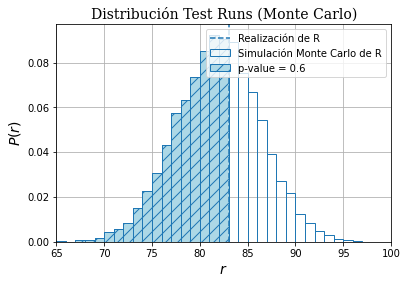

Número de rachas observadas: 83
p-value del Test de Runs (cola izquierda): 0.5955595559555955
p-value conjunto: 0.09208032222535334


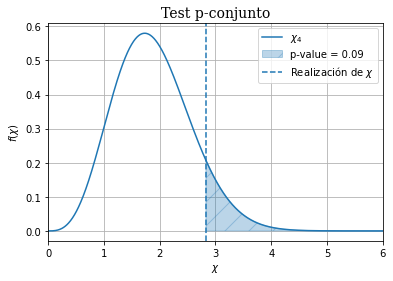

In [6]:
#Número de rachas obtenidas de las "mediciones" con los detectores
R_obs = contar_rachas(ni,fi)

#Encuentro el p-value de mi observación sumando entre los eventos obtenidos hasta la racha observada. Esto indica la probabilidad de
# obtener en la siguiente medición una racha igual o mas baja a R_obs, asumiendo que H0 es cierta.
pvalor_runs = np.sum(counts2[:np.where(bins2 == R_obs)[0][0]])


#Ploteo 
plt.close(3)
plt.figure(3)
plt.bar(bins2[:-1], counts2, width=np.diff(bins2), fill=False, edgecolor='tab:blue',align='edge', label='Simulación Monte Carlo de R')
plt.bar(bins2[:R_obs], counts2[:R_obs], width=np.diff(bins2[:R_obs+1]), color='lightblue',edgecolor='tab:blue' , hatch='//',align='edge', label=f'p-value = {round(pvalor_runs,2)}')
plt.axvline(R_obs, linestyle='dashed', label='Realización de R')
plt.xlabel('$r$' , fontsize=14, family='serif')
plt.ylabel('$P(r)$', fontsize=14, family='serif')
plt.xlim((min(R),max(R)))
plt.title('Distribución Test Runs (Monte Carlo)', fontsize=14, family='serif')
plt.legend()
plt.rcParams['axes.axisbelow'] = True
plt.grid()
plt.show()



## p-value conjunto:
p = np.array([pvalor_chi2,pvalor_runs])

chi_obs = -2* np.log(np.prod(p))

pvalue = 1 - chi.cdf(chi_obs,df=2*len(p))

x = np.linspace(0, 6, 1000)
y = chi.pdf(x, df=2*len(p))

#Ploteo
plt.close(4)
plt.figure(4)
plt.rcParams['axes.axisbelow'] = True
plt.plot(x, y, label='$\chi_{4}$')
plt.fill_between(x, y, where=(x >= chi_obs), alpha=0.3, hatch='/', color='tab:blue', label=f'p-value = {round(pvalue,2)}')
plt.axvline(chi_obs, linestyle='dashed', label='Realización de $\chi$')
plt.xlabel('$\chi$')
plt.ylabel('$f(\chi)$')
plt.xlim((0,6))
plt.title('Test p-conjunto', fontsize=14, family='serif')
plt.grid()
plt.legend()

print("Número de rachas observadas:", R_obs)
print("p-value del Test de Runs (cola izquierda):", pvalor_runs)
print(f"p-value conjunto: {pvalue}")

# Problema 4

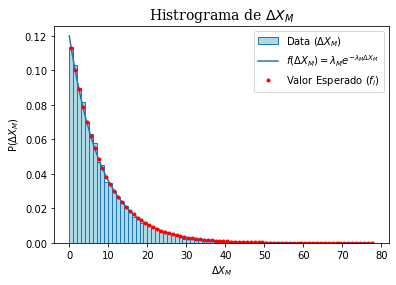

In [7]:
# PROBLEMA 4

N = 1000  # Número de mediciones 
detectores = 100  # Número de detectores


S = poisson.rvs(mu=0.02, size=(N,detectores)) #Lista con N vectores s con distribución de Poisson

M = S + F #Sumo a la estadística del fondo

#Modifico valores mayores a 1 y los reemplazo por un 1
for i in range(len(M)):
    for j in range(len(M[i])):
        if M[i][j] > 1:
            M[i][j] = 1


## ANALISIS DE M: estudio la distribución de las distancias en este nuevo vector M
M = np.hstack(M)
indices_m = np.where(M == 1)[0]
    
dtotal_m = np.diff(indices_m)- 1 #




## Comparo histograma de distancias con la exponencial de lambda_m

n_m = len(dtotal_m) #cantidad de datos
lamb_m = 0.12 #lambda obtenido de la suma de poissonianas lambda_f y lambda_s
ni_m, bins_m = np.histogram(dtotal_m, bins = np.arange(0,max(dtotal_m),1), density=True)
t = np.linspace(0,max(bins_m),10000) #vector para construir la distribución exponencial 
dbin_m = (bins_m[1] - bins_m[0])/2


# Calculo fi como n*int_bin^bin+1(f(x)dx) (Valor esperado en cada bin y a la vez por ser una distribución poissoniana en cada bin fi es la var(ni))
fi_m = []
for i in range(len(ni_m)):
    p_i = expon.cdf(i+1,scale=1/lamb_m) - expon.cdf(i,scale=1/lamb_m)
    fi_m.append(n_m*p_i)
    
fi_m = np.array(fi_m) #Valor esperado de ni_m   


#Ploteo
plt.close(5)
plt.figure(5)
plt.hist(dtotal_m, bins = np.arange(0,max(dtotal_m),1), color = 'lightblue',ec='tab:blue', density=True, label='Data ($\Delta X_M$)')
plt.plot(t,lamb_m*np.exp(-lamb_m*t),label='$f(\Delta X_M )=\lambda_M e^{-\lambda_M \Delta X_M}$')
plt.plot(bins_m[:len(fi_m)]+dbin_m,fi_m/n_m, 'o', color= 'red', markersize=3,label='Valor Esperado ($f_i$)')
plt.xlabel('$\Delta X_M$')
plt.ylabel('P($\Delta X_M$)')
plt.title('Histrograma de $\Delta X_M$', fontsize=14, family='serif')
plt.legend()

# Problema 5

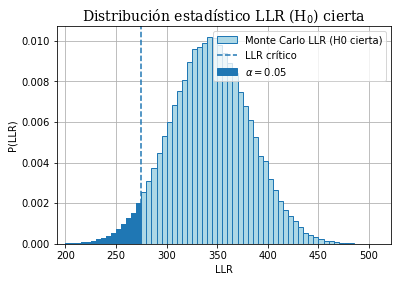

In [8]:
# PROBLEMA 5 

## ESTADISTICO LLR
LLR = [] #H0 cierta
for i in range(100000):
    dx = np.random.exponential(scale=1/lamb, size=len(dtotal)) #H0 cierta, entonces lambda=0.1
    
    LH0 = np.sum(np.log(lamb*np.exp(-lamb*dx)))
    LH1 = np.sum(np.log(lamb_m*np.exp(-lamb_m*dx)))
    
    llr = -2*(LH1 - LH0)
    
    LLR.append(llr)
        
LLR=np.array(LLR)


# Obtengo las cuentas normalizadas del histograma
counts_llr, bins_llr = np.histogram(np.array(LLR), bins = np.arange(0,max(LLR),5), density=True) 
dbin = bins_llr[1]-bins_llr[0]

#Establezco la significancia
alpha = 0.05

# calculo la cdf del histograma
cdf_llr = np.cumsum(counts_llr*dbin)

# encuentro el valor para el cual el área bajo la curva es igual a alpha=0.05
llr_critico = np.argmax(cdf_llr >= alpha)


#Ploteo el estadístico LLR cuando H0 es cierta
plt.close(6)
plt.figure(6)
plt.rcParams['axes.axisbelow'] = True
plt.hist(LLR, bins = np.arange(0,max(LLR),5), color = 'lightblue',ec='tab:blue', density=True, label='Monte Carlo LLR (H0 cierta)')
plt.bar(bins_llr[:llr_critico], counts_llr[:llr_critico], width=np.diff(bins_llr[:llr_critico+1]), color='tab:blue',edgecolor='tab:blue' , hatch='//',align='edge', label=r'$\alpha=0.05$')
plt.axvline(llr_critico*dbin, linestyle='dashed', label='LLR crítico')
plt.xlabel('LLR')
plt.ylabel('P(LLR)')
plt.xlim((min(LLR),max(LLR)))
plt.title('Distribución estadístico LLR (H$_0$) cierta', fontsize=14, family='serif')
plt.grid()
plt.legend()

# Problema 6

La potencia del test LLR es: 0.1902719027190272


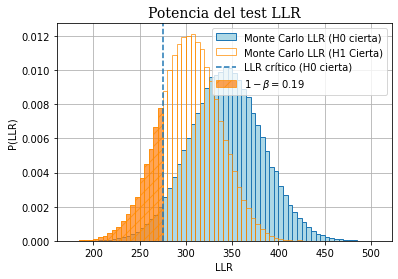

In [9]:
#PROBLEMA 6

## ESTADISTICO LLR
LLR_2 = [] #H1 cierta
for i in range(100000):
    dx = np.random.exponential(scale=1/lamb_m, size=len(dtotal)) #H1 cierta, entonces lambda=0.12
    
    LH0 = np.sum(np.log(lamb*np.exp(-lamb*dx)))
    LH1 = np.sum(np.log(lamb_m*np.exp(-lamb_m*dx)))
    
    llr = -2*(LH0 - LH1)
    
    LLR_2.append(llr)
        
LLR_2=np.array(LLR_2)

# Obtengo las cuentas normalizadas del histograma
counts_llr2, bins_llr2 = np.histogram(np.array(LLR_2), bins = np.arange(0,max(LLR_2),5), density=True)
dbin2 = bins_llr2[1]-bins_llr2[0] 

#Calculo la potencia del test
potencia = np.cumsum(counts_llr2[:llr_critico]*dbin2)[-1]

#Ploteo LLR de ambas hipotesis y coloreo la potencia
plt.close(7)
plt.figure(7)
plt.rcParams['axes.axisbelow'] = True
plt.hist(LLR, bins = np.arange(0,max(LLR),5), color = 'lightblue',ec='tab:blue', density=True, label='Monte Carlo LLR (H0 cierta)')
plt.hist(LLR_2, bins = np.arange(0,max(LLR_2),5), fill=False, ec='darkorange', alpha=0.7, density=True, label='Monte Carlo LLR (H1 Cierta)')
plt.bar(bins_llr2[:llr_critico], counts_llr2[:llr_critico], width=np.diff(bins_llr2[:llr_critico+1]),alpha=0.7, color='tab:orange',edgecolor='darkorange' , hatch='//',align='edge', label='$1-$'+r'$\beta$'+f'$={round(potencia,2)}$')
plt.axvline(llr_critico*dbin, linestyle='dashed', label='LLR crítico (H0 cierta)')
plt.xlabel('LLR')
plt.ylabel('P(LLR)')
plt.xlim((min(LLR_2),max(LLR)))
plt.title('Potencia del test LLR', fontsize=14, family='serif')
plt.grid()
plt.legend()


print(f'La potencia del test LLR es: {potencia}')